Target is sale price

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HOUSE PRICING/HOUSE PRICING DATASET/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HOUSE PRICING/HOUSE PRICING DATASET/test.csv')
#target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HOUSE PRICING/HOUSE PRICING DATASET/train.csv').SalePrice.values
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HOUSE PRICING/HOUSE PRICING DATASET/sample_submission.csv')

In [5]:
#data.head()

In [6]:
#data.describe()

In [7]:
#data.info()

In [8]:
#data.shape

In [9]:
#sample

In [10]:
target = 'SalePrice'

In [11]:
xy = pd.concat([data.drop(columns="SalePrice"), test]) #concat dataset (drop SalePrice) and test dataset
x = xy[0:1460]
y = xy[1460:]

In [12]:
xy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [13]:
#index of object type
ob = data.dtypes[data.dtypes=='object'].index
ob

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
p =[]
for i in ob:
  if len(data[i].unique()) == len(test[i].unique()):
    pass
  else:
    p.append(i)

In [15]:
len(p)

13

In [16]:
for i in p:
  print(f"Clolumn {i} =>\nTrain: {data[i].unique()}\n **** \nTest:  {test[i].unique()}\n\n")

Clolumn MSZoning =>
Train: ['RL' 'RM' 'C (all)' 'FV' 'RH']
 **** 
Test:  ['RH' 'RL' 'RM' 'FV' 'C (all)' nan]


Clolumn Condition2 =>
Train: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
 **** 
Test:  ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery']


Clolumn HouseStyle =>
Train: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
 **** 
Test:  ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '2.5Unf' '1.5Unf']


Clolumn RoofMatl =>
Train: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
 **** 
Test:  ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl']


Clolumn Exterior1st =>
Train: ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
 **** 
Test:  ['VinylSd' 'Wd Sdng' 'HdBoard' 'Plywood' 'MetalSd' 'CemntBd' 'WdShing'
 'BrkFace' 'AsbShng' 'BrkComm' 'Stucco' 'AsphShn' nan 'CBlock']


Clolumn Heating =>
Train: ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor'

In [17]:
len(data.dtypes[data.dtypes=='object']) #43 object columns

43

In [18]:
data.select_dtypes(include=['object']) #select object columns

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [20]:
data.describe().T[['mean','max','std']]

,mean,max,std
Id,730.500000,1460.0,421.610009
MSSubClass,56.897260,190.0,42.300571
LotFrontage,70.049958,313.0,24.284752
LotArea,10516.828082,215245.0,9981.264932
OverallQual,6.099315,10.0,1.382997
OverallCond,5.575342,9.0,1.112799
YearBuilt,1971.267808,2010.0,30.202904
YearRemodAdd,1984.865753,2010.0,20.645407
MasVnrArea,103.685262,1600.0,181.066207
BsmtFinSF1,443.639726,5644.0,456.098091


Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed

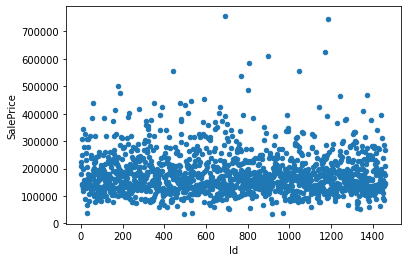

In [21]:
data.plot(x="Id", y="SalePrice", kind="scatter")

In [22]:
#percentage of null in each columns 
data.isnull().sum()[data.isnull().sum()>0]/data.shape[0]*100

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [23]:
#function to handle null data
def null_handler(ind, df): 
  int_list = []
  obj_list = []
  extra = []
  x = df
  for i in ind:
    if x[i].dtype == 'float64' or x[i].dtype=='int64':
      x[i] = x[i].fillna(x[i].mean())
      int_list.append(i)
    elif x[i].dtypes=='object':
      x[i] =x[i].fillna(x[i].mode()[0])
      obj_list.append(i)
    else:
      extra.append(i)
  print(int_list, len(int_list))
  print(obj_list, len(obj_list))
  print(extra, len(extra))
  return x

In [24]:
data_null_list= data.isnull().sum()[data.isnull().sum()>0].index
data_null_list

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [25]:
data_null_handler = null_handler(data.columns,data)
print("*"*500)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] 38
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'G

In [26]:
data_null_handler.isnull().sum() #checking after applied function

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [27]:
pd.set_option('display.max_rows',500, 'display.max_columns', 100)

In [28]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [29]:
data.dtypes[data.dtypes=='object'].isnull().sum()[data.dtypes[data.dtypes=='object'].isnull().sum()>0]

array([], dtype=int64)

In [30]:
data.dtypes[data.dtypes=='object']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

In [31]:
data_dummies = pd.get_dummies(data_null_handler, drop_first= True)
data_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [32]:
data.shape

(1460, 81)

In [33]:
data_dummies.shape

(1460, 247)

## Test Dataset

In [34]:
test.isnull().sum()[test.isnull().sum()>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [35]:
test.isnull().sum()[test.isnull().sum()>0]/test.shape[0]*100

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64

In [36]:
test_null_list = test.isnull().sum()[test.isnull().sum()>0].index

In [37]:
test_null_handler = null_handler(test_null_list, test)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'] 11
['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType'] 22
[] 0


In [38]:
test_null_handler.isnull().sum()[test_null_handler.isnull().sum()>0]

Series([], dtype: int64)

In [39]:
test_dummies = pd.get_dummies(test_null_handler, drop_first = True)
test_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,...,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,1,0,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,0,0,1,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


## Training data (train data)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats

In [41]:
lr = LinearRegression()

In [42]:
data_target = data_dummies.SalePrice

In [43]:
data_target.shape

(1460,)

In [44]:
data_dummies.drop(columns='SalePrice', axis = 1, inplace= True)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(data_dummies,data_target, test_size = 0.3, random_state = 0) 

In [46]:
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(x_test)

In [48]:
data_mse = mean_squared_error(y_test, y_pred)
data_mse

2618946854.4730477

In [49]:
data_r2 = r2_score(y_test, y_pred)
data_r2

0.6142362415319927

In [50]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [51]:
report = sm.OLS(y_test, y_pred).fit()
print (report.rsquared_adj)

0.9356792260178539


In [52]:
report.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              6373.
Date:                Tue, 15 Mar 2022   Prob (F-statistic):                   1.01e-262
Time:                        04:33:25   Log-Likelihood:                         -5365.3
No. Observations:                 438   AIC:                                  1.073e+04
Df Residuals:                     437   BIC:                                  1.074e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9600      0.012     79.829      0.000       0.936       0.984
==============================================================================
Omnibus:                      532.895   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220190.962
Skew:                          -5.029   Prob(JB):                         0.00
Kurtosis:                     112.381   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ridge and Lasso

In [53]:
ridge = Ridge(random_state= 0)
ls = Lasso(random_state=0, max_iter=2000)

In [54]:
ridge.fit(x_train, y_train)

Ridge(random_state=0)

In [55]:
ls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.865e+08, tolerance: 6.234e+08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(max_iter=2000, random_state=0)

In [56]:
ridge_pred= ridge.predict(x_test)
ls_pred = ls.predict(x_test)

In [57]:
ridge_report = sm.OLS(y_test, ridge_pred).fit()
ls_report = sm.OLS(y_test, ls_pred).fit()

In [58]:
print(ridge_report.rsquared_adj)

0.9543172597612536


In [59]:
print(ls_report.rsquared_adj)

0.9376683631304515


## Train Combine Data (Train + Test)

In [60]:
xy = pd.concat([data_null_handler,test_null_handler])
xy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000.0


In [61]:
xy.shape

(2919, 81)

In [62]:
xy.drop('Id', axis =1, inplace=True)

Data Cleansing

In [63]:
xy_null_index = xy.isnull().sum()[xy.isnull().sum()>0].index
xy_null_index

Index(['SalePrice'], dtype='object')

In [64]:
xy_null_handler = null_handler(xy_null_index,xy)

['SalePrice'] 1
[] 0
[] 0


In [65]:
# check after treating null values
xy_null_handler.isnull().sum()[xy_null_handler.isnull().sum()>0]

Series([], dtype: int64)

In [66]:
xy_null_handler.isnull().sum().max()

0

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Exploring the Linear Correlation between Features is helpful since it can highlight which features look to be the most useful for predicting the target variable

In [68]:
corr_matrix = xy_null_handler.corr()

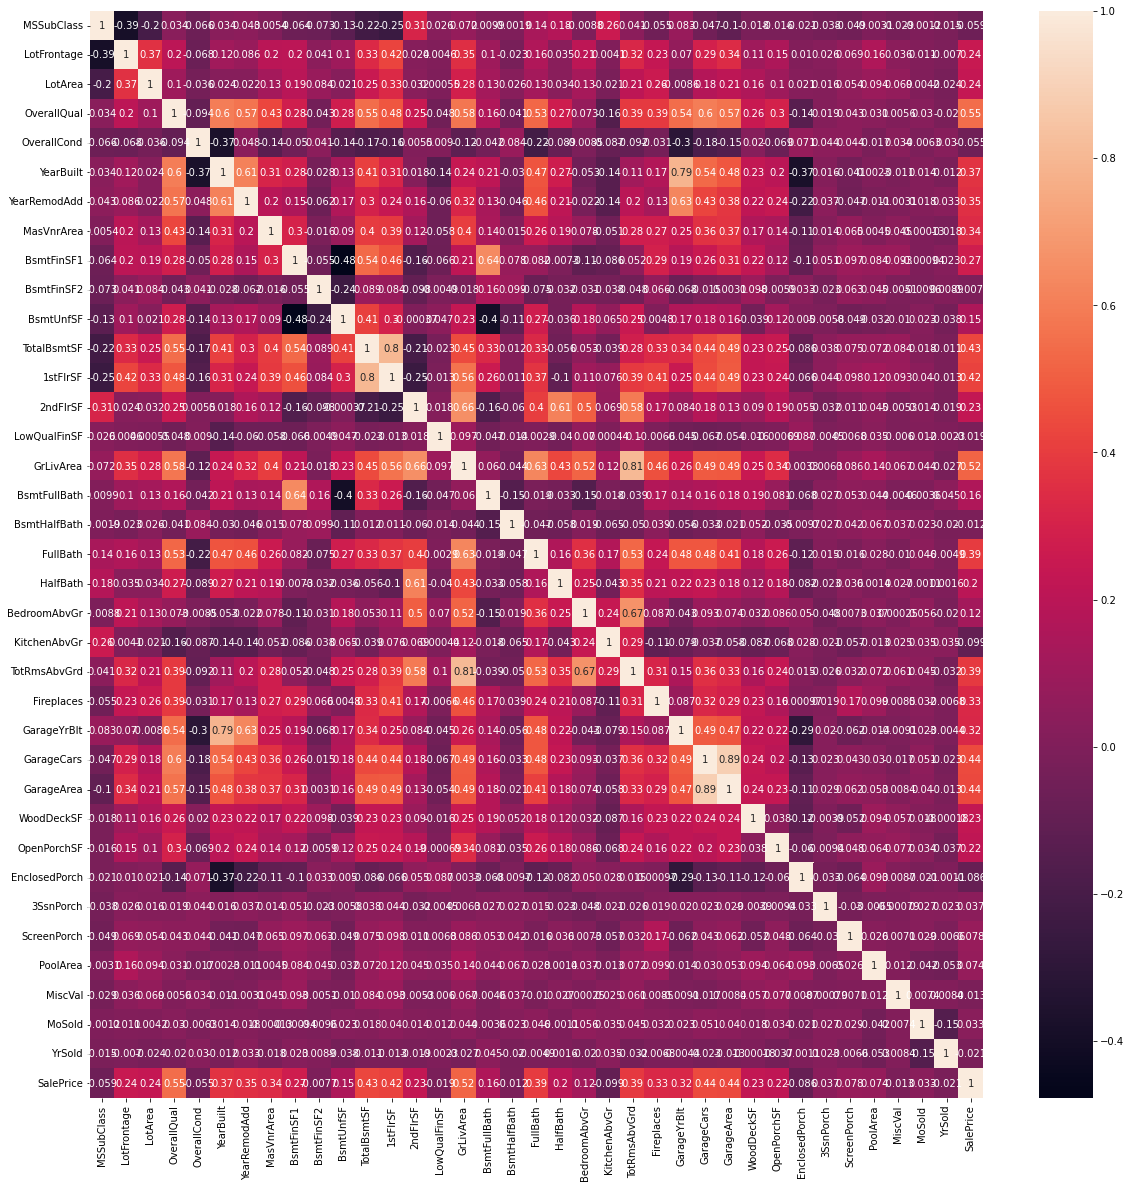

In [69]:
plt.figure(figsize= (20,20))
sns.heatmap(corr_matrix, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


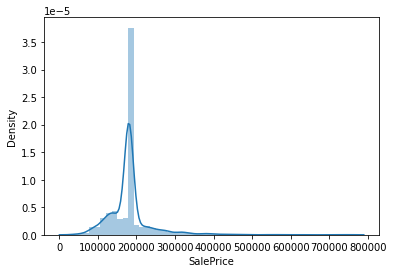

In [70]:
# distribution of SalePrice
sns.distplot(xy.SalePrice) 

The distribution of Target variable is right_skewed and has outliers.
Some ways to deal with such distributions are to:

Perform a logarithmic transformation on the values (Normalization and Standardization do not alter the skewness, just the scale)

Explore the Percentiles to come up with some upper/lower thresholds beyond which the values are set to something more common (Boxplots also help here)

We use a Log Transform here: it is simple and the resulting distribution is visually very similar to a Gaussian.

In [71]:
#check for the skew in data
xy.skew().sort_values(ascending = False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


MiscVal          21.958480
PoolArea         16.907017
LotArea          12.829025
LowQualFinSF     12.094977
3SsnPorch        11.381914
KitchenAbvGr      4.304467
BsmtFinSF2        4.148146
EnclosedPorch     4.005950
ScreenPorch       3.948723
BsmtHalfBath      3.933331
SalePrice         2.660964
MasVnrArea        2.612951
OpenPorchSF       2.536417
WoodDeckSF        1.843380
LotFrontage       1.644577
1stFlrSF          1.470360
BsmtFinSF1        1.425971
MSSubClass        1.376165
GrLivArea         1.270010
TotalBsmtSF       1.163095
BsmtUnfSF         0.919996
2ndFlrSF          0.862118
TotRmsAbvGrd      0.758757
Fireplaces        0.733872
HalfBath          0.694924
BsmtFullBath      0.624258
OverallCond       0.570605
BedroomAbvGr      0.326492
GarageArea        0.241342
OverallQual       0.197212
MoSold            0.195985
FullBath          0.167692
YrSold            0.132467
GarageCars       -0.218409
GarageYrBlt      -0.393035
YearRemodAdd     -0.451252
YearBuilt        -0.600114
d

In [72]:
#where do most values lie under? explore the Percentiles
for i in range(95,100):
  print (f"{i}% of the target values lie under: {int(np.percentile(xy[target],i))}")

95% of the target values lie under: 278000
96% of the target values lie under: 295914
97% of the target values lie under: 318028
98% of the target values lie under: 344151
99% of the target values lie under: 394931


In [73]:
print(f"Critical values:\n\tMax: {xy[target].max()} \n\tMin: {xy[target].min()}")

Critical values:
	Max: 755000.0 
	Min: 34900.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Before Log Transform: Skewness 2.659596385716253
After Log Transform: Sknewness -0.25469305628288164
Applying Inverse Transformation: Skewness 2.659596385716252
Final Skewness: -0.25469305628288164


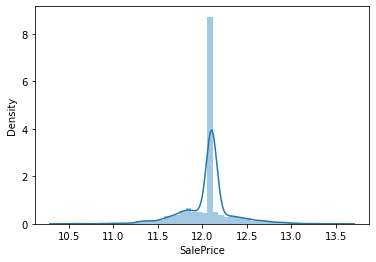

In [74]:
# log transform to reduce skewness of the Target Distribution
print(f"Before Log Transform: Skewness {stats.skew(xy.SalePrice)}")
xy['SalePrice']= np.log1p(xy['SalePrice'])
print(f"After Log Transform: Sknewness {stats.skew(xy.SalePrice)}")
print(f"Applying Inverse Transformation: Skewness {stats.skew(np.expm1(xy.SalePrice))}") # This is to demonstrate retaining our original targets
print(f"Final Skewness: {stats.skew(xy.SalePrice)}")
sns.distplot(xy["SalePrice"])

Check Multicollinearity

In [75]:
#sort the highest linear correlation with target
corr_matrix[target].apply(lambda x: abs(x)).sort_values(ascending= False)

SalePrice        1.000000
OverallQual      0.548617
GrLivArea        0.520311
GarageCars       0.444406
GarageArea       0.437654
TotalBsmtSF      0.431912
1stFlrSF         0.422097
FullBath         0.394977
TotRmsAbvGrd     0.390869
YearBuilt        0.368664
YearRemodAdd     0.354302
MasVnrArea       0.339702
Fireplaces       0.329421
GarageYrBlt      0.320790
BsmtFinSF1       0.273579
LotFrontage      0.244694
LotArea          0.236105
2ndFlrSF         0.229926
WoodDeckSF       0.227241
OpenPorchSF      0.218983
HalfBath         0.200900
BsmtFullBath     0.158871
BsmtUnfSF        0.152487
BedroomAbvGr     0.117945
KitchenAbvGr     0.098734
EnclosedPorch    0.086496
ScreenPorch      0.078206
PoolArea         0.073608
MSSubClass       0.059294
OverallCond      0.055036
3SsnPorch        0.036693
MoSold           0.032698
YrSold           0.020656
LowQualFinSF     0.018975
MiscVal          0.013101
BsmtHalfBath     0.011578
BsmtFinSF2       0.007672
Name: SalePrice, dtype: float64

We find out that two features OverallQual      0.548617
GrLivArea        0.520311 are the most linearly correlated with target.

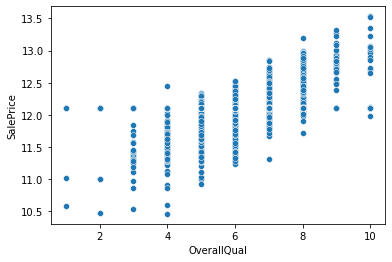

In [76]:
#Explore the linearly correlated features
sns.scatterplot(x='OverallQual', y='SalePrice', data= xy)

Feature Engineering and Feature Selection

Some aspects of Feature Engineering include:

Create Aggregated Features (can result in more robust models, as will be seen later)

Dealing with heavily Skewed features (either dropping them, transforming them or doing nothing)

Scaling/Normalizing numeric variables (really only required for non-Tree-based algorithms like SVMs, Linear Regression, MLP etc.)

Encodings for Categorical Variables (the only thing that's necessary to carry out here)

In [77]:
xy_dummies = pd.get_dummies(xy_null_handler, drop_first = True)
print(xy_dummies.shape,"\n\n")
xy_dummies.SalePrice

(2919, 246) 




0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.105822
1455    12.105822
1456    12.105822
1457    12.105822
1458    12.105822
Name: SalePrice, Length: 2919, dtype: float64

In [78]:
#printing all categorial columns
obj_columns= xy_null_handler.select_dtypes('object').columns.tolist()
num_columns= xy_null_handler.select_dtypes(include= np.number).columns.tolist()

In [79]:
#find the heavily skewed features
skewed_features = xy[num_columns].apply(lambda x: abs(stats.skew(x))).sort_values(ascending= False)
high_skewed = skewed_features[skewed_features>0.5]
high_skewed

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146014
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931310
MasVnrArea        2.611608
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.643732
1stFlrSF          1.469604
BsmtFinSF1        1.425238
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.162497
BsmtUnfSF         0.919523
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.623937
YearBuilt         0.599806
OverallCond       0.570312
dtype: float64

In [80]:
xy_clean = xy_dummies.drop_duplicates()
xy_clean.shape

(2919, 246)

In [81]:
xy_clean.SalePrice

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.105822
1455    12.105822
1456    12.105822
1457    12.105822
1458    12.105822
Name: SalePrice, Length: 2919, dtype: float64

In [82]:
xy_target = xy_dummies.SalePrice

In [83]:
xy_target.shape

(2919,)

In [84]:
xy_dummies.drop(columns="SalePrice", axis= 1, inplace=True)

In [85]:
#function to store model score
#The Accuracy of the model is the average of the accuracy of each fold.
score = {}
def get_cv_score(estimator):
  return np.mean(cross_val_score(estimator, X= x_train1, y= y_train1, cv=5, n_jobs=-1))*100

In [86]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [87]:
x_train1,x_test1, y_train1, y_test1 = train_test_split(xy_dummies, xy_target, test_size= 0.3, random_state = 0) 

Train with LinearRegression

In [88]:
lr = LinearRegression()

In [89]:
lr.fit(x_train1,y_train1)

LinearRegression()

In [90]:
y_lr_pred= lr.predict(x_test1)

In [91]:
mean_squared_error(y_test1, y_lr_pred)

0.056802121228447425

In [92]:
r2_score(y_test1,y_lr_pred)

0.2643345065739042

In [93]:
score["linear_regression"]= get_cv_score(lr)
score['linear_regression']

31.820898903173717

## Train with Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rfr= RandomForestRegressor(n_estimators= 100, min_samples_leaf= 5, min_samples_split=5, n_jobs=-1)

In [96]:
rfr.fit(x_train1,y_train1)

RandomForestRegressor(min_samples_leaf=5, min_samples_split=5, n_jobs=-1)

In [97]:
y_rfr_pred = rfr.predict(x_test1)

In [98]:
mean_squared_error(y_test1,y_rfr_pred)

0.0127853155538631

In [99]:
r2_score(y_test1, y_rfr_pred)

0.8344126016401215

In [100]:
score['random_forest_regressor']= get_cv_score(rfr)
score['random_forest_regressor']

84.82579235120092

In [101]:
#feature importance
importances = rfr.feature_importances_
importances
features_imp = pd.Series(importances, index = x_train1.columns)

In [102]:
 #get first 10 important features
features_imp = features_imp.sort_values(ascending= False)
features_imp[:10]

OverallQual    0.313807
PoolQC_Gd      0.272020
GrLivArea      0.115905
GarageArea     0.060186
TotalBsmtSF    0.045508
1stFlrSF       0.029872
GarageCars     0.020030
BsmtFinSF1     0.014561
YearBuilt      0.013833
LotArea        0.011956
dtype: float64

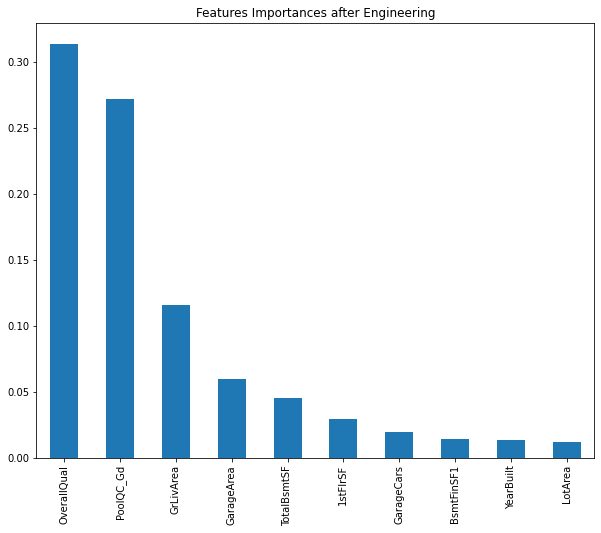

In [103]:
#Visualize the importances
plt.figure(figsize=(10,8))
plt.title("Features Importances after Engineering")
features_imp[:10].plot.bar()

Train with AdaBoost Regressor

In [104]:
from sklearn.ensemble import AdaBoostRegressor

In [105]:
ada = AdaBoostRegressor(n_estimators=150, random_state= 42)

In [106]:
ada.fit(x_train1, y_train1)

AdaBoostRegressor(n_estimators=150, random_state=42)

In [107]:
y_ada_pred = ada.predict(x_test1)

In [108]:
mean_squared_error(y_test1, y_ada_pred)

0.0457909619595541

In [109]:
r2_score(y_test1, y_ada_pred)

0.4069441440584787

In [110]:
score['adaboost_regression'] = get_cv_score(ada)
score['adaboost_regression']

40.93550795829211

Train with XGBRegressor

In [111]:
from xgboost import XGBRegressor

In [112]:
XGB = XGBRegressor(n_estimators= 300, max_depth=5, learning_rate= 0.1, random_state= 42)

In [113]:
XGB.fit(x_train1, y_train1)

[04:34:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, n_estimators=300, random_state=42)

In [114]:
y_XGB_pred= XGB.predict(x_test1)

In [115]:
mean_squared_error(y_test1, y_XGB_pred)

0.009063880170696693

In [116]:
r2_score(y_test1, y_XGB_pred)

0.8826103016238916

In [117]:
score['XGBoost_regressor'] = get_cv_score(XGB)
score['XGBoost_regressor']

87.52546851948264

In [118]:
lst = ['linear_regression', 'random_forest_regressor', 'adaboost_regression','XGBoost_regressor']
for i in lst:
  print(f'{i}: {score[i]}')

linear_regression: 31.820898903173717
random_forest_regressor: 84.82579235120092
adaboost_regression: 40.93550795829211
XGBoost_regressor: 87.52546851948264


In [120]:
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler

In [156]:
model = Sequential()
model.add(Dense(256, activation="relu"))
model.add(Dense(1, input_dim = x_train1.shape[1]))
model.compile(loss = "mse", optimizer = "adam")

In [157]:
model.summary()

ValueError: ignored

In [158]:
model.fit(x_train1, y_train1, epochs= 350, batch_size= 100)

Epoch 1/350
21/21 [==============================] - 0s 3ms/step - loss: 45053.1289
Epoch 2/350
21/21 [==============================] - 0s 3ms/step - loss: 3288.3921
Epoch 3/350
21/21 [==============================] - 0s 3ms/step - loss: 866.2673
Epoch 4/350
21/21 [==============================] - 0s 3ms/step - loss: 358.3592
Epoch 5/350
21/21 [==============================] - 0s 3ms/step - loss: 230.0885
Epoch 6/350
21/21 [==============================] - 0s 3ms/step - loss: 173.2031
Epoch 7/350
21/21 [==============================] - 0s 3ms/step - loss: 143.2624
Epoch 8/350
21/21 [==============================] - 0s 3ms/step - loss: 120.8787
Epoch 9/350
21/21 [==============================] - 0s 3ms/step - loss: 107.1714
Epoch 10/350
21/21 [==============================] - 0s 3ms/step - loss: 107.1462
Epoch 11/350
21/21 [==============================] - 0s 3ms/step - loss: 89.0456
Epoch 12/350
21/21 [==============================] - 0s 4ms/step - loss: 129.7670
Epoch 13/35

In [159]:
pred_train = model.predict(x_train1)
print(np.sqrt(mean_squared_error(y_train1,pred_train )))

4.2421780321938165
